<div style="background-color:orange;text-align:center;vertical-align:middle"><table><tr><td><pre>
<!-- <center><h1><font color='darkorange'>Kodluyoruz & Patika.dev Academy</font></h1></center> -->
<p align="center"><img src="https://i.im.ge/2021/09/11/TQ9Pvp.png" alt="TQ9Pvp.png" width=500></p>
<!--https://www.kodluyoruz.org/wp-content/uploads/2018/02/kodluyoruz_logo_sosyalgirisim.png-->
<p align="center"><img src="https://upload.wikimedia.org/wikipedia/tr/9/9f/Eczac%C4%B1ba%C5%9F%C4%B1_spor_kul%C3%BCb%C3%BC_%28logo%29.jpg" alt="TQmmAq.jpg" width=70></p>
<!--https://www.kodluyoruz.org/wp-content/uploads/2018/03/Frame.png-->
<center><h1><em><font color='darkorange'>110. VitrA Veri Bilimi Bootcamp </font></em></h1></center>
<center><h2><em><font color='darkorange'>September-2021</font></em></h2></center>
<table style="width:35%">
    <tr>
        <td><b>Project:</b></td>
        <td>Vitra - Pharma Sales Prediction </td>
    </tr>
    <tr>
        <td><b>Data Owner:</b></td>
        <td>Sercan Kara</td>
    </tr>
    <tr>
        <td><b>Group Members:</b></td>
        <td>Erkan Çetinyamaç</td>
    </tr>
    <tr>
        <td><b></b></td>
        <td>Yağmur Uzun</td>
    </tr>
    <tr>
        <td><b></b></td>
        <td>Arda Can Baysar</td>
  </tr>
  <tr>
        <td></td>
        <td>Eren Kaya</td>
  </tr>
    <tr>
        <td></td>
        <td>Melike Demirdağ</td>
  </tr>
</table>
</pre></td></tr></table></div>

# **Problem Description and Aim Of The Project**

Since predicting to feature sales holds crucial importance for a company, it is vital to build a model to predict next sale amounts in order to company can benefit from this critical intel. Therefore, our project group aims to build a model that can predict next sale amounts.

In [ ]:
from google.colab import drive
#drive.mount("/content/drive")

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")
sns.set_style("whitegrid")

# **Data Preprocess and Feature Engineering**

In [ ]:
#df = pd.read_excel('/content/drive/My Drive/ColabNotebooks/VitrA-Proje/DataPharma.xlsx')
df = pd.read_excel('/content/DataPharma.xlsx')
from sklearn.utils import shuffle
#df = shuffle(df)

In [ ]:
df.shape

(48288, 5)

In [ ]:
df.head(10)

,Year,Period,Product,Province,Quantity
0,2017,201701,PRODUCT_A,ANKARA,16
1,2017,201701,PRODUCT_A,ANKARA,25
2,2017,201701,PRODUCT_A,ANKARA,56
3,2017,201701,PRODUCT_A,ANKARA,16
4,2017,201701,PRODUCT_A,ADANA,11
5,2017,201701,PRODUCT_A,ADANA,25
6,2017,201701,PRODUCT_A,ANKARA,35
7,2017,201701,PRODUCT_A,ADANA,54
8,2017,201701,PRODUCT_A,ADANA,17
9,2017,201701,PRODUCT_A,ADANA,30


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48288 entries, 0 to 48287
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Year      48288 non-null  int64 
 1   Period    48288 non-null  int64 
 2   Product   48288 non-null  object
 3   Province  48288 non-null  object
 4   Quantity  48288 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 1.8+ MB


# **Feature Descriptions**

**Product:**

**Product A : Chronic Gastroenterology, Sales volume proportional to the number of patients.**

**Product B : Acute: Painkiller.**

**Product C : Acute : Digestive System, for children 0-4 years old.**

**Product V : Vitamin.**

**Product X : Chronic: Urology, Patient group with a high average age.**


**Period and Year features contains dates for the sales.**

**Province is the city information that product was sold.**

**Quantity is the number of drug that was sold.**








In [ ]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Year,48288.0,2017.975294,0.837014,2017.0,2017.0,2018.0,2019.0,2019.0
Period,48288.0,201804.001885,83.874548,201701.0,201709.0,201806.0,201904.0,201912.0
Quantity,48288.0,129.562127,260.973107,-407.0,13.0,39.0,122.0,5958.0


In [ ]:
df.describe(include="object").T

,count,unique,top,freq
Product,48288,5,PRODUCT_B,17962
Province,48288,82,ISTANBUL,5619


In [ ]:
df.isna().sum()

Year        0
Period      0
Product     0
Province    0
Quantity    0
dtype: int64

In [ ]:
df.Quantity.describe()


count    48288.000000
mean       129.562127
std        260.973107
min       -407.000000
25%         13.000000
50%         39.000000
75%        122.000000
max       5958.000000
Name: Quantity, dtype: float64

In [ ]:
df.Quantity.skew(),df.Quantity.kurt()


(5.297577127300715, 47.284430208549566)

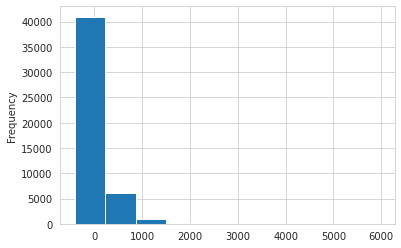

In [ ]:
df.Quantity.plot(kind='hist')

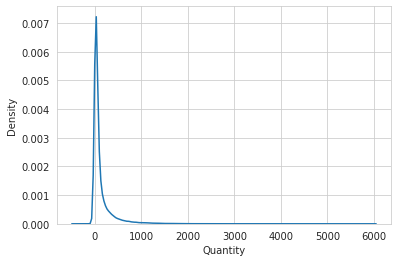

In [ ]:
sns.kdeplot(data=df, x="Quantity")

In [ ]:
conInt = lambda x : int(x) 
df['Period'] = df['Period'].apply(conInt)
df['Period2'] = df['Period']

df.head(10)

,Year,Period,Product,Province,Quantity,Period2
0,2017,201701,PRODUCT_A,ANKARA,16,201701
1,2017,201701,PRODUCT_A,ANKARA,25,201701
2,2017,201701,PRODUCT_A,ANKARA,56,201701
3,2017,201701,PRODUCT_A,ANKARA,16,201701
4,2017,201701,PRODUCT_A,ADANA,11,201701
5,2017,201701,PRODUCT_A,ADANA,25,201701
6,2017,201701,PRODUCT_A,ANKARA,35,201701
7,2017,201701,PRODUCT_A,ADANA,54,201701
8,2017,201701,PRODUCT_A,ADANA,17,201701
9,2017,201701,PRODUCT_A,ADANA,30,201701


In [ ]:
df.Period.unique()

array([201701, 201702, 201703, 201704, 201705, 201706, 201707, 201711,
       201801, 201708, 201804, 201802, 201709, 201712, 201805, 201803,
       201710, 201806, 201811, 201809, 201807, 201812, 201902, 201810,
       201901, 201903, 201808, 201904, 201905, 201907, 201910, 201908,
       201906, 201911, 201909, 201912])

In [ ]:
# def new_date(x):
#   a=str(x)
#   return a[4:6]+'-'+a[:4]
# df['new_date'] = df.Period.apply(new_date)

**Adding external data,the inflation information monthly and annual from TC. Merkez Bankası.**

**Source Link:https://www.tcmb.gov.tr/wps/wcm/connect/TR/TCMB+TR/Main+Menu/Istatistikler/Enflasyon+Verileri/Tuketici+Fiyatlari**

In [ ]:
#enf = pd.read_table('/content/drive/My Drive/ColabNotebooks/VitrA-Proje/Enf.txt')
enf= pd.read_table("/content/Enf.txt")
enf.rename(columns={'Tarih ': 'Period','TUFE-(Yillik%Degisim)':'TUFE_Annual_Change', 'TUFE-(Aylik%Degisim)':'TUFE_Monthly_Change'},inplace=True)
def new_date(x):
  a=str(x)
  b=a[3:]+a[:2]
  return b
enf['Period'] = enf['Period'].apply(new_date)
enf['Period'] = enf['Period'].apply(conInt)

In [ ]:
enf.head()

,Period,TUFE_Annual_Change,TUFE_Monthly_Change
0,202108,19.25,1.12
1,202107,18.95,1.80
2,202106,17.53,1.94
3,202105,16.59,0.89
4,202104,17.14,1.68


In [ ]:
enf.Period.unique()

array([202108, 202107, 202106, 202105, 202104, 202103, 202102, 202101,
       202012, 202011, 202010, 202009, 202008, 202007, 202006, 202005,
       202004, 202003, 202002, 202001, 201912, 201911, 201910, 201909,
       201908, 201907, 201906, 201905, 201904, 201903, 201902, 201901,
       201812, 201811, 201810, 201809, 201808, 201807, 201806, 201805,
       201804, 201803, 201802, 201801, 201712, 201711, 201710, 201709,
       201708, 201707, 201706, 201705, 201704, 201703, 201702, 201701,
       201612, 201611, 201610, 201609, 201608, 201607, 201606, 201605,
       201604, 201603, 201602, 201601, 201512, 201511, 201510, 201509,
       201508, 201507, 201506, 201505, 201504, 201503, 201502, 201501,
       201412, 201411, 201410, 201409, 201408, 201407, 201406, 201405,
       201404, 201403, 201402, 201401, 201312, 201311, 201310, 201309,
       201308, 201307, 201306, 201305, 201304, 201303, 201302, 201301,
       201212, 201211, 201210, 201209, 201208, 201207, 201206, 201205,
      

In [ ]:
df.isna().sum()

Year        0
Period      0
Product     0
Province    0
Quantity    0
Period2     0
dtype: int64

In [ ]:
df = pd.merge(df,enf,how='left',on='Period')
df.isna().sum()

Year                   0
Period                 0
Product                0
Province               0
Quantity               0
Period2                0
TUFE_Annual_Change     0
TUFE_Monthly_Change    0
dtype: int64

In [ ]:
df.shape

(48288, 8)

In [ ]:
df.head()

,Year,Period,Product,Province,Quantity,Period2,TUFE_Annual_Change,TUFE_Monthly_Change
0,2017,201701,PRODUCT_A,ANKARA,16,201701,9.22,2.46
1,2017,201701,PRODUCT_A,ANKARA,25,201701,9.22,2.46
2,2017,201701,PRODUCT_A,ANKARA,56,201701,9.22,2.46
3,2017,201701,PRODUCT_A,ANKARA,16,201701,9.22,2.46
4,2017,201701,PRODUCT_A,ADANA,11,201701,9.22,2.46


**Adding external data,the USD-TL currency monthly information   from TC. Merkez Bankası.**

**Source Link:https://www.tcmb.gov.tr/wps/wcm/connect/tr/tcmb+tr/main+menu/istatistikler/doviz+kurlari/reel+efektif+doviz+kuruu**

In [ ]:
# https://www.tcmb.gov.tr/wps/wcm/connect/tr/tcmb+tr/main+menu/istatistikler/doviz+kurlari/reel+efektif+doviz+kuruu  USD-TL Curency - Source

#kur = pd.read_excel('/content/drive/My Drive/ColabNotebooks/VitrA-Proje/Kur.xlsx')
kur = pd.read_excel("/content/Kur.xlsx")
df = pd.merge(df,kur,how='left',on='Period')

In [ ]:
df.head()

,Year,Period,Product,Province,Quantity,Period2,TUFE_Annual_Change,TUFE_Monthly_Change,USD-TL
0,2017,201701,PRODUCT_A,ANKARA,16,201701,9.22,2.46,3.741614
1,2017,201701,PRODUCT_A,ANKARA,25,201701,9.22,2.46,3.741614
2,2017,201701,PRODUCT_A,ANKARA,56,201701,9.22,2.46,3.741614
3,2017,201701,PRODUCT_A,ANKARA,16,201701,9.22,2.46,3.741614
4,2017,201701,PRODUCT_A,ADANA,11,201701,9.22,2.46,3.741614


In [ ]:
df.shape

(48288, 9)

In [ ]:
typo = lambda x : 'ISTANBUL' if x == 'İSTANBUL' else x
df['Province'] = df['Province'].apply(typo)


df['Year'] = df['Year'].astype(np.int64)
df['Quantity'] = df['Quantity'].astype(np.int64)
df['Period2'] = df['Period2'].astype(np.int64)


df['Period'] = pd.to_datetime(df['Period'], format='%Y%m')
df['Month'] = df.Period.dt.month

def seasonality(x):
  if x in(12,1,2):
    return "winter"
  elif x in (3,4,5):
    return "spring"
  elif x in(6,7,8):
    return "summer"
  else:
    return "autumn"
df["Season"]=df["Month"].apply(seasonality)

In [ ]:
df.Province.unique()

array(['ANKARA', 'ADANA', 'AYDIN', 'BALIKESİR', 'BARTIN', 'AFYON',
       'ADIYAMAN', 'AĞRI', 'AKSARAY', 'BURSA', 'AMASYA', 'DÜZCE',
       'EDİRNE', 'ELAZIĞ', 'ERZİNCAN', 'ERZURUM', 'ŞIRNAK', 'SİVAS',
       'TEKİRDAĞ', 'ISTANBUL', 'TOKAT', 'TRABZON', 'İZMİR', 'KOCAELİ',
       'BATMAN', 'BİLECİK', 'BAYBURT', 'ANTALYA', 'İÇEL', 'IĞDIR',
       'ISPARTA', 'ESKİŞEHİR', 'ÇANAKKKALE', 'DİYARBAKIR', 'KONYA',
       'RİZE', 'GAZİANTEP', 'SAKARYA', 'GİRESUN', 'HATAY', 'ÇORUM',
       'ÇANKIRI', 'KAHRAMANMARAŞ', 'KARABÜK', 'KARS', 'KASTAMONU',
       'KARAMAN', 'KAYSERİ', 'SİNOP', 'BURDUR', 'SAMSUN', 'KÜTAHYA',
       'ORDU', 'OSMANİYE', 'BINGOL', 'BOLU', 'BITLIS', 'ARTVİN',
       'DENİZLİ', 'ŞANLIURFA', 'SİİRT', 'GÜMÜŞHANE', 'HAKKARİ', 'NİĞDE',
       'MALATYA', 'MANİSA', 'KİLİS', 'KIRIKKALE', 'KIRKLARELİ',
       'KIRŞEHİR', 'MARDIN', 'UŞAK', 'VAN', 'TUNCELİ', 'YALOVA', 'YOZGAT',
       'MUĞLA', 'ZONGULDAK', 'MUŞ', 'NEVŞEHİR', 'ARDAHAN'], dtype=object)

In [ ]:
def region(x):
  if x in ['EDİRNE','KIRKLARELİ','TEKİRDAĞ','ISTANBUL','KOCAELİ','YALOVA','SAKARYA','BİLECİK','BURSA','BALIKESİR','ÇANAKKKALE']:
    return "Marmara"
  elif x in ['AKSARAY','ANKARA','ÇANKIRI','ESKİŞEHİR','KARAMAN','KIRIKKALE','KIRŞEHİR','KONYA','NEVŞEHİR','NİĞDE','SİVAS','YOZGAT','KAYSERİ']:
    return "İc_Anadolu"
  elif x in ['İZMİR','MANİSA','AYDIN','DENİZLİ','KÜTAHYA','AFYON','UŞAK','MUĞLA']:
    return "Ege"
  elif x in ['ADANA','OSMANİYE','ANTALYA','BURDUR','HATAY','ISPARTA','İÇEL','KAHRAMANMARAŞ']:
    return "Akdeniz"
  elif x in ['RİZE','TRABZON','ARTVİN','SİNOP','TOKAT','ÇORUM','AMASYA','SAMSUN','ZONGULDAK','BOLU','DÜZCE','KARABÜK','BARTIN','KASTAMONU','BAYBURT','GİRESUN','GÜMÜŞHANE','ORDU']:
    return "Karadeniz"
  elif x in ['AĞRI','ARDAHAN','BINGOL','BITLIS','ELAZIĞ','ERZİNCAN','ERZURUM','HAKKARİ','IĞDIR','KARS','MALATYA','MUŞ','TUNCELİ','VAN','ŞIRNAK']:
    return "Dogu_Anadolu"
  elif x in ['ADIYAMAN','BATMAN','DİYARBAKIR','GAZİANTEP','KİLİS','MARDIN','SİİRT','ŞANLIURFA']:
    return "Guneydogu_Anadolu"
  else:
    return np.nan

df["Region"]=df["Province"].apply(region)


Is_Metropol = lambda x : 1 if x in ['ANKARA','İZMİR','ISTANBUL','BURSA','ANTALYA','ADANA','İÇEL','AYDIN','SAMSUN','MANİSA'] else 0
df["Metropol"] = df['Province'].apply(Is_Metropol)


df["Product"]=df["Product"].str.split("_",expand=True)[1]

def TotalAmountQuantityDistribution(x):
  if x == 'B':
    return 5
  elif x == "X":
    return 4
  elif x == "A":
    return 3
  elif x == "C":
    return 2
  else:
    return 1
df['Total_Sale_Volume'] = df['Product'].apply(TotalAmountQuantityDistribution)

In [ ]:
df.isna().sum()

Year                   0
Period                 0
Product                0
Province               0
Quantity               0
Period2                0
TUFE_Annual_Change     0
TUFE_Monthly_Change    0
USD-TL                 0
Month                  0
Season                 0
Region                 0
Metropol               0
Total_Sale_Volume      0
dtype: int64

In [ ]:
df.head()

,Year,Period,Product,Province,Quantity,Period2,TUFE_Annual_Change,TUFE_Monthly_Change,USD-TL,Month,Season,Region,Metropol,Total_Sale_Volume
0,2017,2017-01-01,A,ANKARA,16,201701,9.22,2.46,3.741614,1,winter,İc_Anadolu,1,3
1,2017,2017-01-01,A,ANKARA,25,201701,9.22,2.46,3.741614,1,winter,İc_Anadolu,1,3
2,2017,2017-01-01,A,ANKARA,56,201701,9.22,2.46,3.741614,1,winter,İc_Anadolu,1,3
3,2017,2017-01-01,A,ANKARA,16,201701,9.22,2.46,3.741614,1,winter,İc_Anadolu,1,3
4,2017,2017-01-01,A,ADANA,11,201701,9.22,2.46,3.741614,1,winter,Akdeniz,1,3


In [ ]:
# s = df.groupby('Period2')['Quantity'].median().loc[201703,]
# df_test['prev_1_ym'].map(s).f
# s
# s
# s = df.groupby('Period2')['Quantity'].median().loc[df[,]]

In [ ]:
# df['diff_frm_lst_month'] = df.groupby('Period2')['Quantity'].diff()
# df["previous_days_stock_price"] = df["Quantity"].groupby('Period2').Province.shift(1)

In [ ]:
# df.groupby('Period2')['Quantity'].diff()
# df.dropna(how='any',inplace=True)

In [ ]:
df.shape

(48288, 14)

In [ ]:
# #Turkey 5 Years CDS: historic value range for every year. Source: http://www.worldgovernmentbonds.com/cds-historical-data/turkey/5-years/
# CDSIndex = pd.read_table('/content/drive/My Drive/ColabNotebooks/VitrA-Proje/CDSIndex.txt')
# CDSIndex.rename(columns={'Change': 'CDS_Change','Min':'CDS_Min', 'Max':'CDS_Max'},inplace=True)
# # #CDSIndex = pd.read_table("/content/CDSIndex.txt")
# df = pd.merge(df,CDSIndex,how='left',on='Year')

In [ ]:
# CDSIndex.head()

In [ ]:
df.shape

(48288, 14)

In [ ]:
df.head()

,Year,Period,Product,Province,Quantity,Period2,TUFE_Annual_Change,TUFE_Monthly_Change,USD-TL,Month,Season,Region,Metropol,Total_Sale_Volume
0,2017,2017-01-01,A,ANKARA,16,201701,9.22,2.46,3.741614,1,winter,İc_Anadolu,1,3
1,2017,2017-01-01,A,ANKARA,25,201701,9.22,2.46,3.741614,1,winter,İc_Anadolu,1,3
2,2017,2017-01-01,A,ANKARA,56,201701,9.22,2.46,3.741614,1,winter,İc_Anadolu,1,3
3,2017,2017-01-01,A,ANKARA,16,201701,9.22,2.46,3.741614,1,winter,İc_Anadolu,1,3
4,2017,2017-01-01,A,ADANA,11,201701,9.22,2.46,3.741614,1,winter,Akdeniz,1,3


In [ ]:
df.sort_values(by="Period",ascending=True,inplace = True)

In [ ]:
productt = df.Product.unique()
provinces= df.Province.unique()


In [ ]:
for prod in productt:
  for provinc in provinces:
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M1']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(1)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M2']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(2)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M3']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(3)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M6']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(6)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M9']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(9)
   df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity_M12']=  df.loc[(df.Product==prod) & (df.Province == provinc),'Quantity'].shift(12)



In [ ]:
df.loc[(df.Product=='A') & (df.Province == 'ISTANBUL'),['Quantity','Quantity_M1']]

,Quantity,Quantity_M1
574,23,NaN
571,20,23.0
570,18,20.0
564,27,18.0
563,13,27.0
...,...,...
17101,25,51.0
17100,19,25.0
17099,138,19.0
17098,128,138.0


# **Visualization**

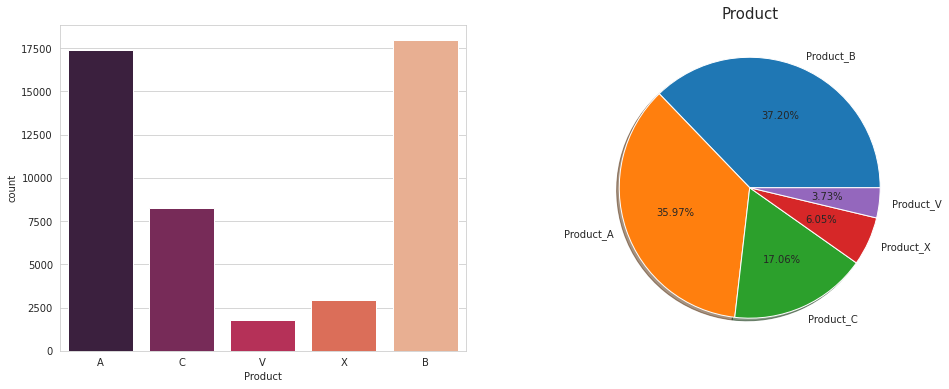

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.countplot(x='Product', data=df,palette="rocket")

plt.subplot(1, 2, 2)
plt.pie(df['Product'].value_counts(), autopct='%1.2f%%', shadow=True,labels=["Product_B","Product_A","Product_C","Product_X","Product_V"])#, explode=[0, 0.05],colors=["lightcoral","lightskyblue"])
plt.title('Product', fontsize=15)

plt.show()

In [ ]:
#sns.pairplot(df)

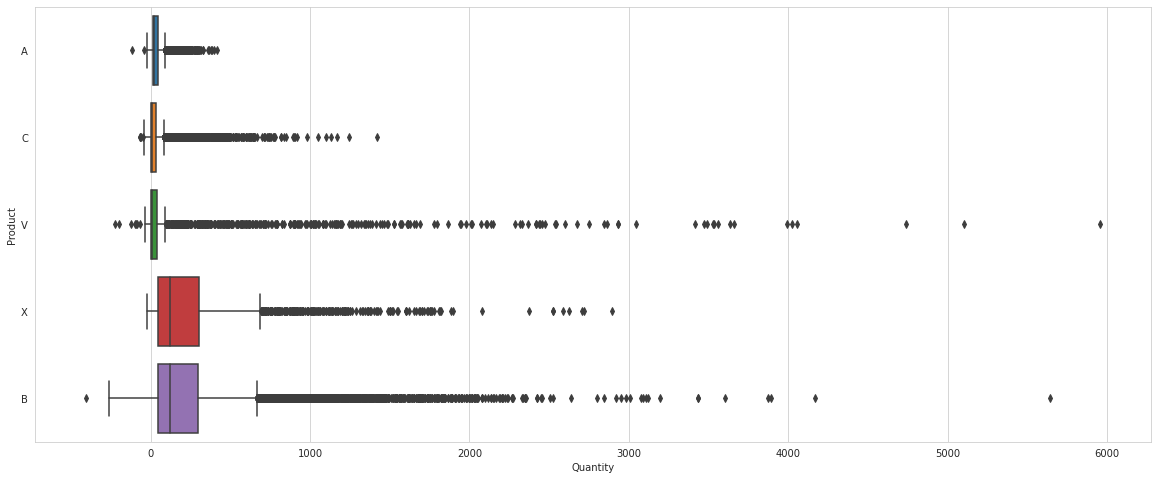

In [ ]:
plt.figure(figsize=(20, 8))
sns.boxplot(x="Quantity",y="Product",data=df)
plt.show()

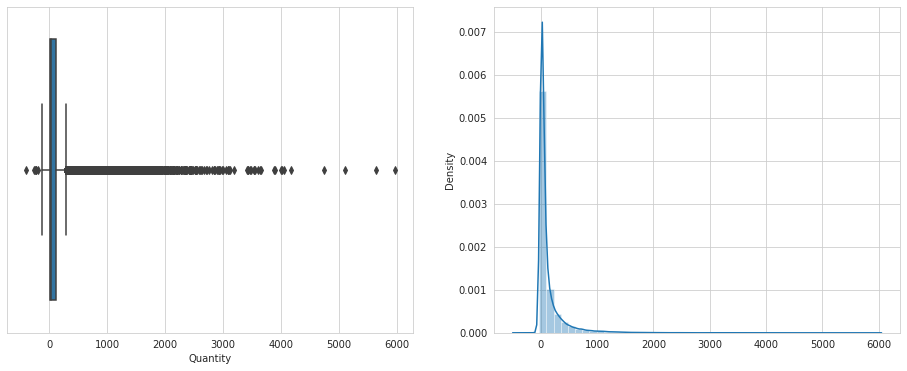

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Quantity",data=df)

plt.subplot(1, 2, 2)
sns.distplot(x=df["Quantity"])

plt.show()

In [ ]:
df.groupby("Product")["Quantity"].mean() #ürün tipine göre miktarların ortalaması

Product
A     33.201716
B    239.917660
C     42.351141
V    180.377432
X    238.645548
Name: Quantity, dtype: float64

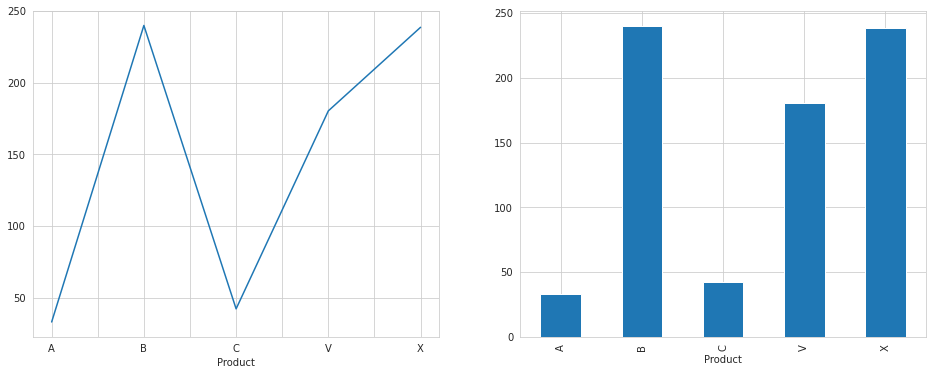

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
df.groupby("Product")["Quantity"].mean().plot()

plt.subplot(1, 2, 2)
df.groupby("Product")["Quantity"].mean().plot(kind="bar")

plt.show()

In [ ]:
df.groupby("Year")["Quantity"].mean() #yıla göre miktarlar

Year
2017    147.094716
2018    138.195024
2019    103.122390
Name: Quantity, dtype: float64

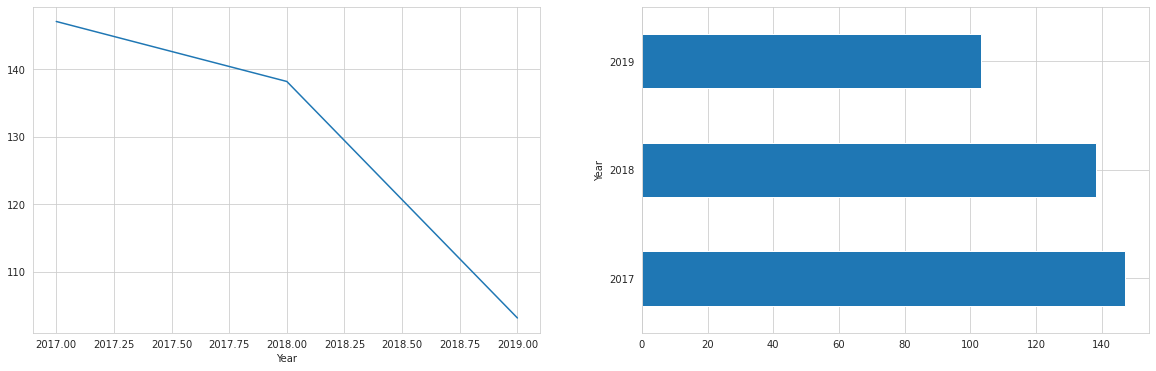

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
df.groupby("Year")["Quantity"].mean().plot(figsize=(20,6))

plt.subplot(1, 2, 2)
df.groupby("Year")["Quantity"].mean().plot(kind="barh",figsize=(20,6))
plt.show()

In [ ]:
df.pivot_table(index=["Year"],columns=["Product",],aggfunc={"Quantity":"mean"})

Quantity                                               
Product          A           B          C           V           X
Year                                                             
2017     26.216634  307.559840  53.752706  218.723200  227.282631
2018     31.770186  249.697061   1.195915  145.315254  232.787321
2019     41.357507  162.397459  40.930560  174.761986  255.968008

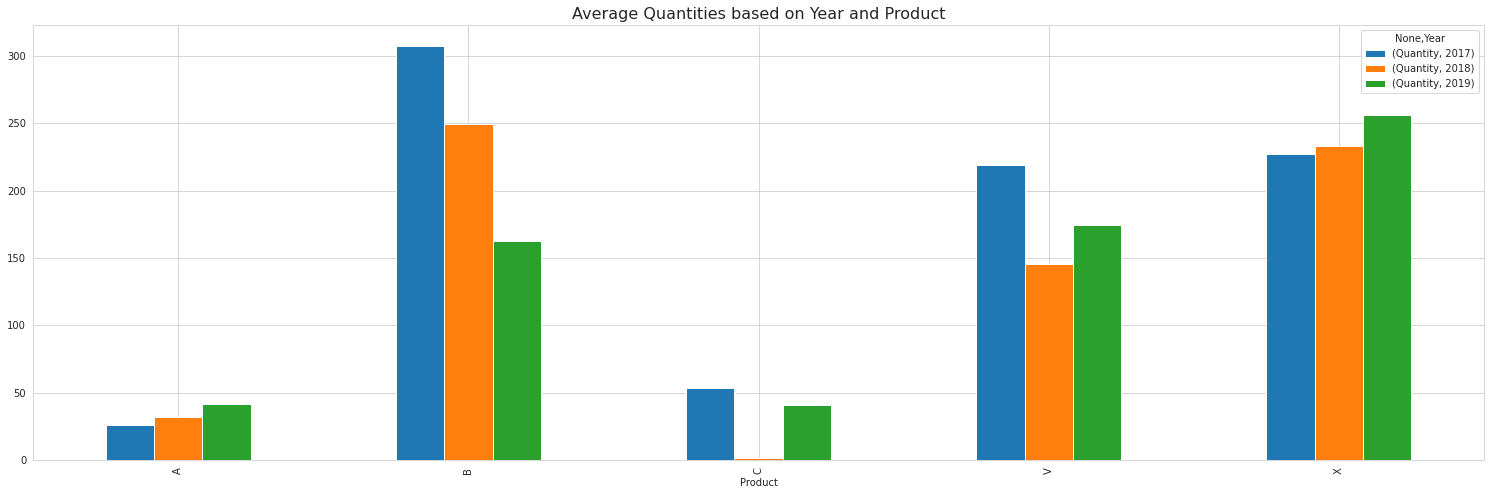

In [ ]:
ax = df.pivot_table(index=["Product"],columns=["Year",],aggfunc={"Quantity":"mean"}).plot(kind="bar",figsize=(26,8))
plt.title('Average Quantities based on Year and Product', fontsize=16)
plt.show()

In [ ]:
df.pivot_table(index=["Year"],columns=["Product",],aggfunc={"Quantity":"sum"}) 

Quantity                                 
Product        A        B       C       V       X
Year                                             
2017      149094  1842591  228449  136702  221146
2018      184140  1495186    1288   85736  227666
2019      243513   971624  119067  102061  248033

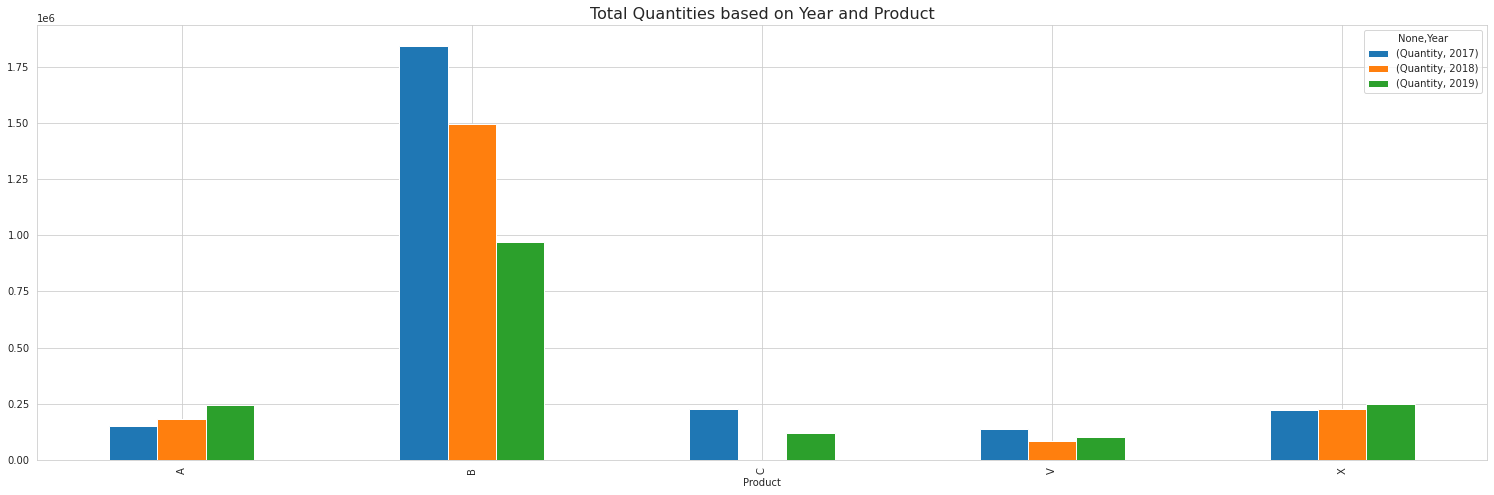

In [ ]:
ax = df.pivot_table(index=["Product"],columns=["Year",],aggfunc={"Quantity":"sum"}).plot(kind="bar",figsize=(26,8))
plt.title('Total Quantities based on Year and Product', fontsize=16)
plt.show()

In [ ]:
df.pivot_table(index=["Metropol"],columns=["Product",],aggfunc={"Product":"count"}) 

Product                        
Product        A     B     C     V     X
Metropol                                
0           7921  8333  3943  1403  2524
1           9450  9629  4293   396   396

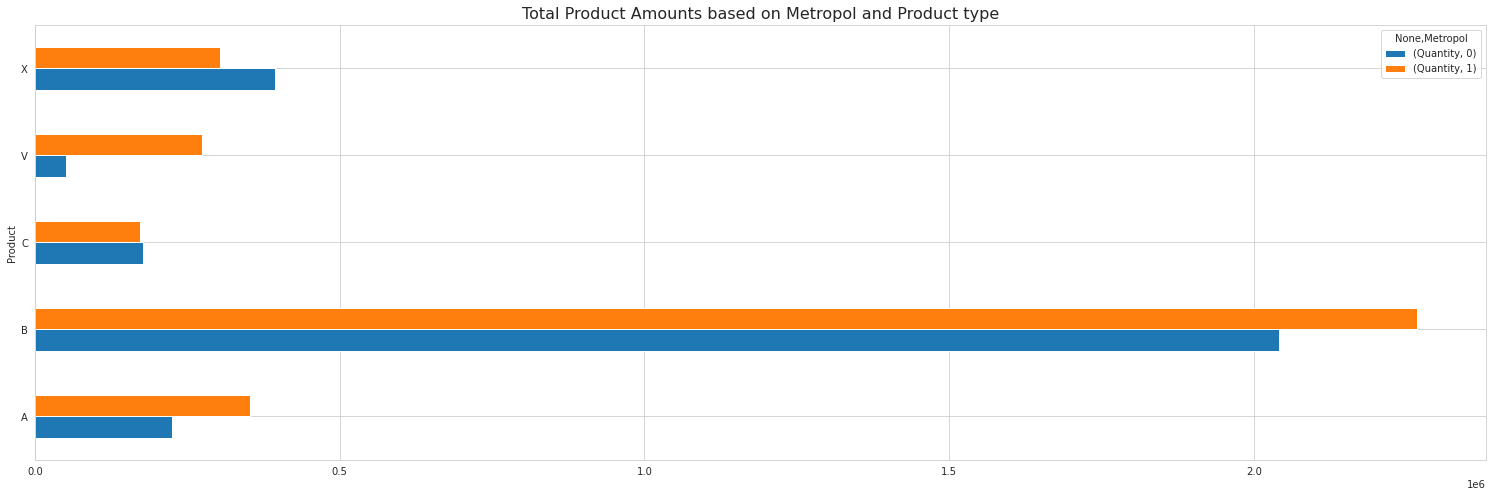

In [ ]:
df.pivot_table(index=["Product"],columns=["Metropol"],aggfunc={"Quantity":"sum"}).plot(kind="barh",figsize=(26,8))
plt.title('Total Product Amounts based on Metropol and Product type', fontsize=16)
plt.show()

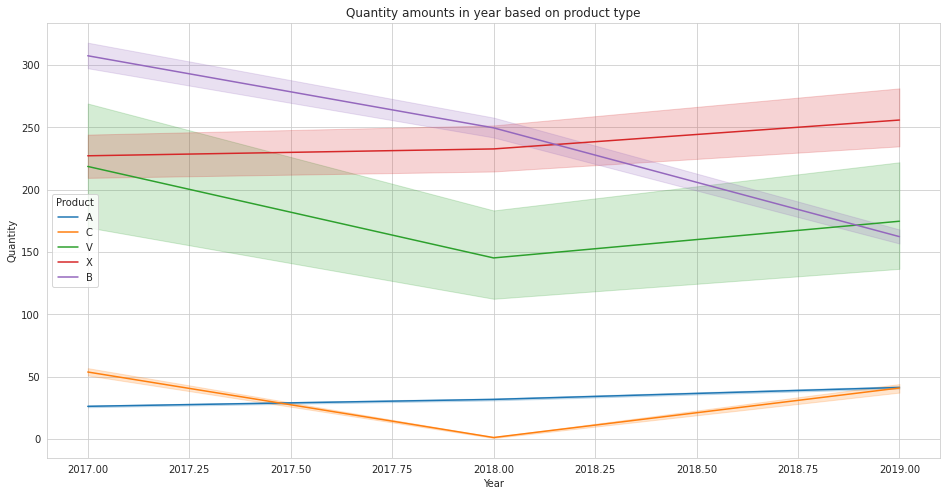

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df["Year"],y=df["Quantity"],hue=df["Product"])
plt.title("Quantity amounts in year based on product type")
plt.show()

In [ ]:
df.groupby("Province")["Quantity"].sum().sort_values().tail(30)

Province
ERZURUM         50780
TRABZON         51246
OSMANİYE        52942
KÜTAHYA         55403
KARABÜK         56401
TEKİRDAĞ        60158
ÇANAKKKALE      64102
ELAZIĞ          64177
MUĞLA           74338
SAKARYA         75837
ZONGULDAK       79776
ORDU            86746
HATAY           97526
KAYSERİ         98461
DENİZLİ         99029
İÇEL           130942
ESKİŞEHİR      132934
SAMSUN         134352
AYDIN          134774
KOCAELİ        139756
GAZİANTEP      147082
KONYA          187301
BALIKESİR      195033
ADANA          195979
MANİSA         233964
BURSA          246277
ANTALYA        290838
ANKARA         349044
İZMİR          411927
ISTANBUL      1241136
Name: Quantity, dtype: int64

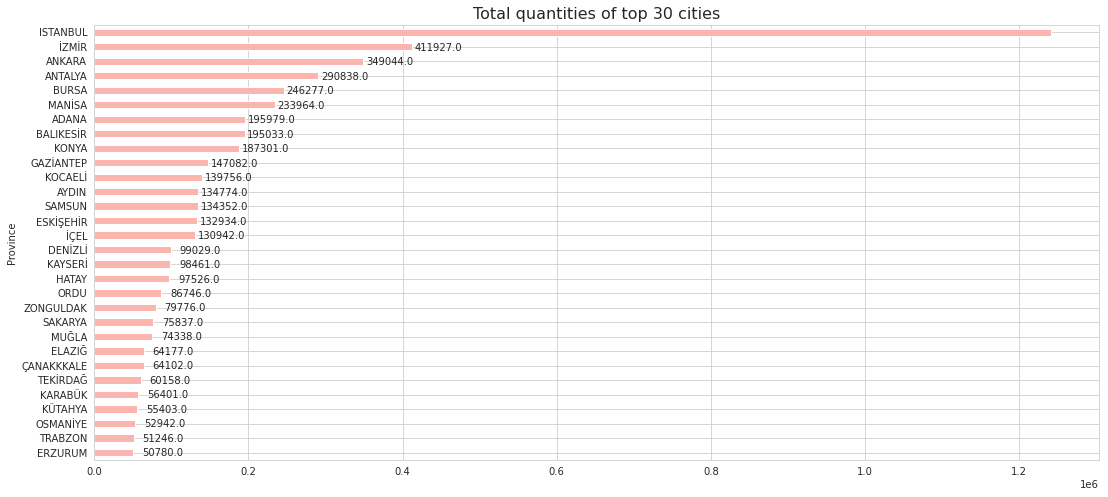

In [ ]:
total = float(len(df))
ax = df.groupby("Province")["Quantity"].sum().sort_values().tail(30).plot(kind="barh",ylabel="Provinces",colormap="Pastel1",figsize=(18,8))
plt.title('Total quantities of top 30 cities', fontsize=16)
for p in ax.patches:
    count = '{:.1f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width()+65000, p.get_y()
    ax.annotate(count, (x, y), ha='right')
plt.show()

In [ ]:
df.groupby("Province")["Quantity"].mean().sort_values().tail(30)

Province
BİLECİK       128.823045
BURSA         129.008381
BOLU          131.782468
ÇANAKKKALE    132.716356
AYDIN         133.439604
KÜTAHYA       135.129268
TEKİRDAĞ      137.347032
SAMSUN        137.796923
KONYA         138.638786
AMASYA        138.668317
ISTANBUL      141.102319
ADANA         148.020393
KAYSERİ       152.889752
KOCAELİ       153.578022
ERZURUM       153.878788
BARTIN        158.951049
SİVAS         158.971519
AĞRI          164.781395
ORDU          166.180077
GAZİANTEP     175.097619
AKSARAY       176.285714
ANTALYA       198.118529
ESKİŞEHİR     219.001647
ZONGULDAK     223.462185
KİLİS         230.045802
OSMANİYE      230.182609
MANİSA        242.701245
ELAZIĞ        254.670635
BALIKESİR     271.255911
KARABÜK       343.908537
Name: Quantity, dtype: float64

In [ ]:
df.groupby('Product').Quantity.agg(['sum','count', 'mean', 'min', 'max'])

,sum,count,mean,min,max
Product,,,,,
A,576747,17371,33.201716,-118,413
B,4309401,17962,239.917660,-407,5642
C,348804,8236,42.351141,-66,1422
V,324499,1799,180.377432,-223,5958
X,696845,2920,238.645548,-22,2893


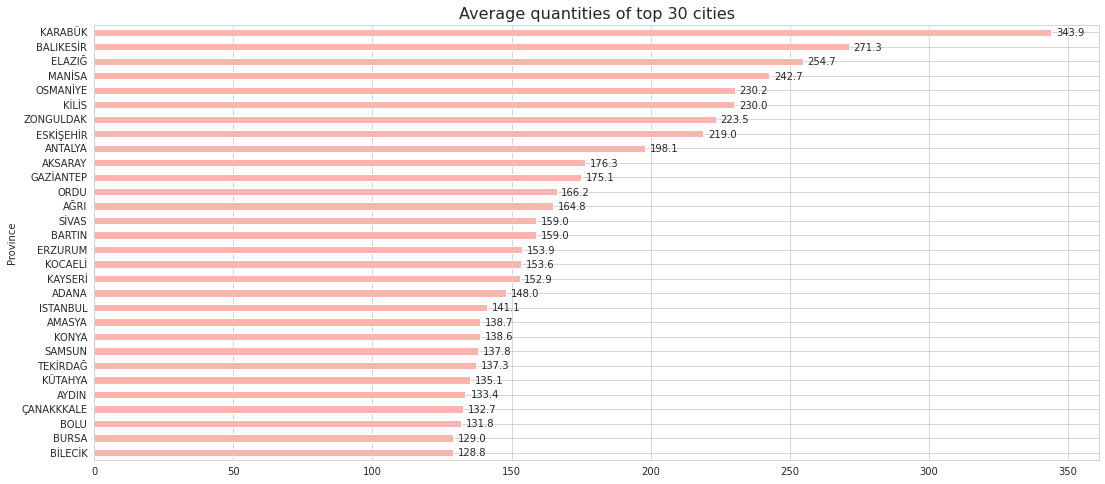

In [ ]:
total = float(len(df))
ax = df.groupby("Province")["Quantity"].mean().sort_values().tail(30).plot(kind="barh",ylabel="Provinces",colormap="Pastel1",figsize=(18,8))
plt.title('Average quantities of top 30 cities', fontsize=16)
for p in ax.patches:
    count = '{:.1f}'.format(p.get_width())
    x, y = p.get_x() + p.get_width()+12, p.get_y()
    ax.annotate(count, (x, y), ha='right')
plt.show()

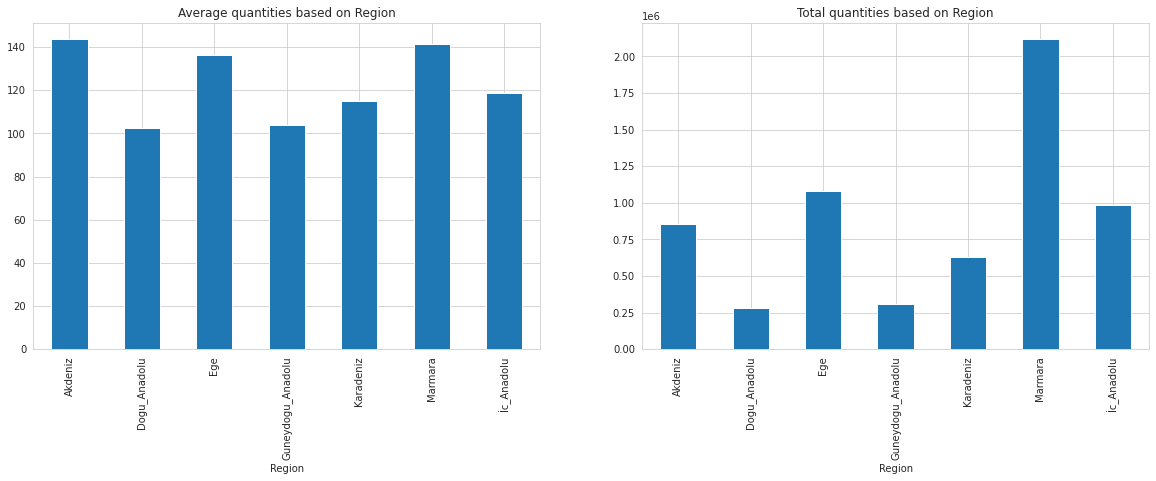

In [ ]:
plt.figure(figsize=(20, 6))
plt.subplot(1, 2, 1)
df.groupby('Region').Quantity.mean().plot(kind="bar")
plt.title("Average quantities based on Region")

plt.subplot(1, 2, 2)
df.groupby('Region').Quantity.sum().plot(kind="bar")
plt.title("Total quantities based on Region")

plt.show()

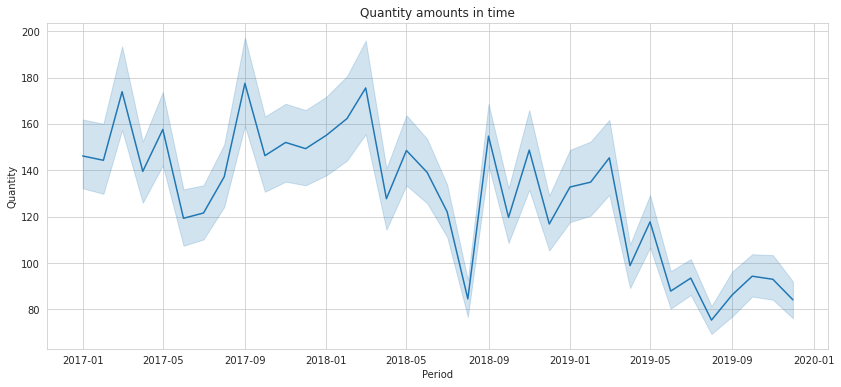

In [ ]:
plt.figure(figsize=(14,6))
sns.lineplot(x=df["Period"],y=df["Quantity"])
plt.title("Quantity amounts in time")
plt.show()

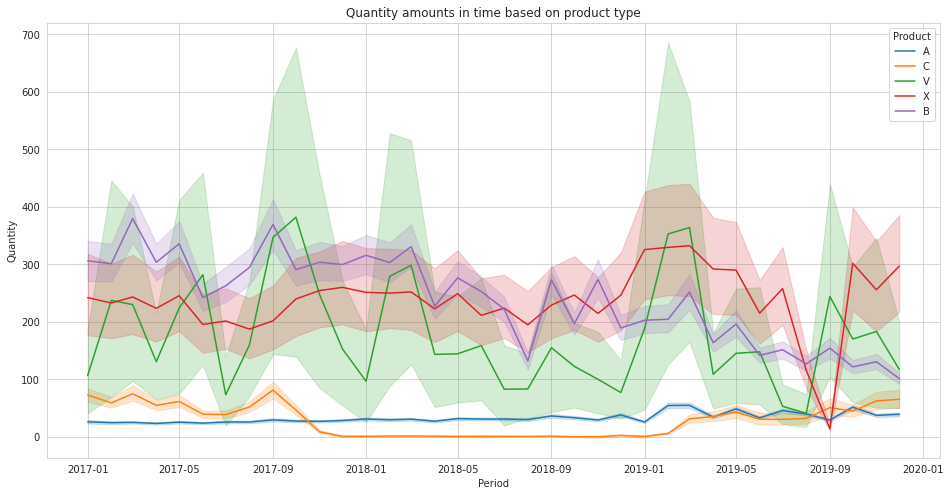

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df["Period"],y=df["Quantity"],hue=df["Product"])
plt.title("Quantity amounts in time based on product type")
plt.show()

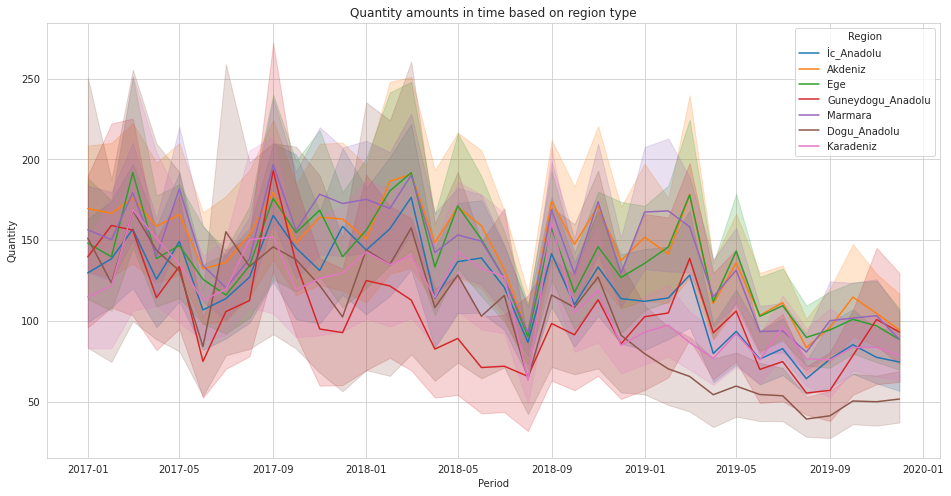

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df["Period"],y=df["Quantity"],hue=df["Region"])
plt.title("Quantity amounts in time based on region type")
plt.show()

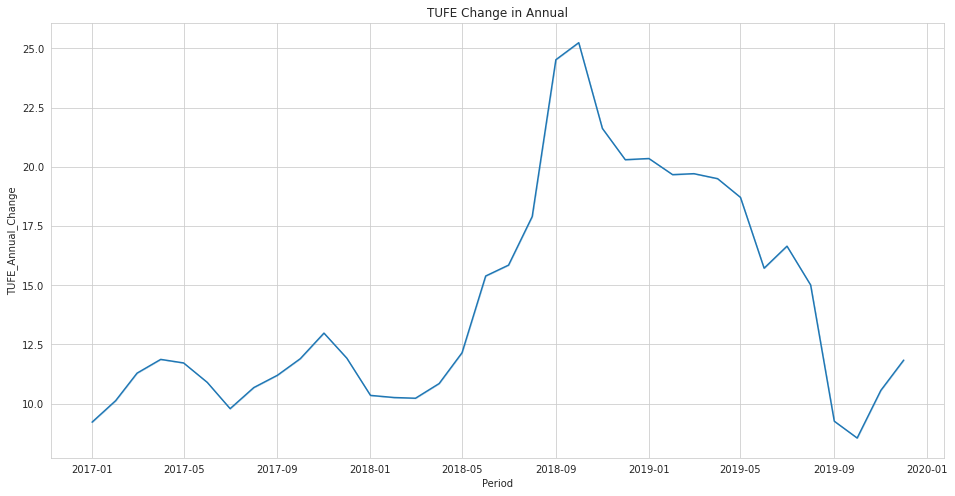

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df["Period"],y=df["TUFE_Annual_Change"])
plt.title("TUFE Change in Annual")
plt.show()

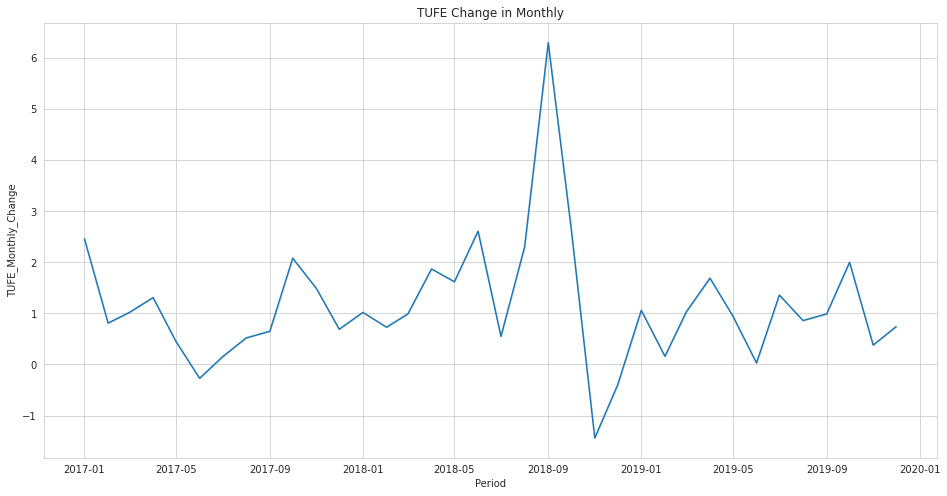

In [ ]:
plt.figure(figsize=(16,8))
sns.lineplot(x=df["Period"],y=df["TUFE_Monthly_Change"])
plt.title("TUFE Change in Monthly")
plt.show()

In [ ]:
df_17_18=pd.DataFrame({"2017_Average":df[df.Year==2017].groupby("Product")["Quantity"].mean(),"2018_Average":df[df.Year==2018].groupby("Product")["Quantity"].mean()}).reset_index()
df_17_18

,Product,2017_Average,2018_Average
0,A,26.216634,31.770186
1,B,307.559840,249.697061
2,C,53.752706,1.195915
3,V,218.723200,145.315254
4,X,227.282631,232.787321


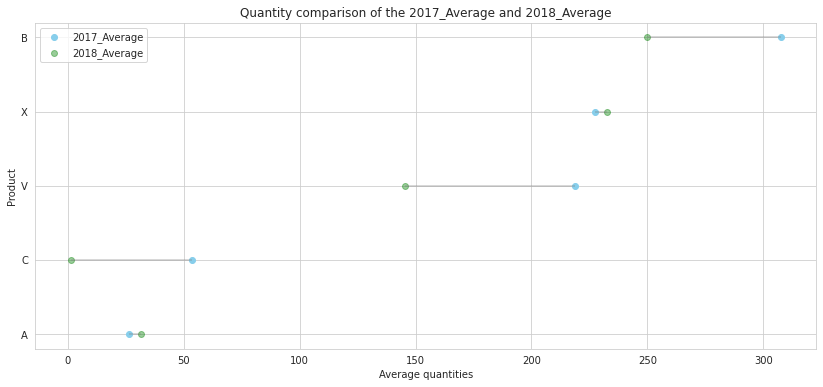

In [ ]:
#Lollipop Graph
plt.figure(figsize=(14,6))
ordered_df = df_17_18.sort_values(by='2017_Average')
my_range=range(1,len(df_17_18.index)+1)

plt.hlines(y=my_range, xmin=ordered_df['2017_Average'], xmax=ordered_df['2018_Average'], color='grey', alpha=0.4)
plt.scatter(ordered_df['2017_Average'], my_range, color='skyblue', alpha=1, label='2017_Average')
plt.scatter(ordered_df['2018_Average'], my_range, color='green', alpha=0.4 , label='2018_Average')
plt.legend()

plt.yticks(my_range, ordered_df['Product'])
plt.title("Quantity comparison of the 2017_Average and 2018_Average")
plt.xlabel('Average quantities')
plt.ylabel('Product')

plt.show()

In [ ]:
df_17_19=pd.DataFrame({"2017_Average":df[df.Year==2017].groupby("Product")["Quantity"].mean(),"2019_Average":df[df.Year==2019].groupby("Product")["Quantity"].mean()}).reset_index()
df_17_19

,Product,2017_Average,2019_Average
0,A,26.216634,41.357507
1,B,307.559840,162.397459
2,C,53.752706,40.930560
3,V,218.723200,174.761986
4,X,227.282631,255.968008


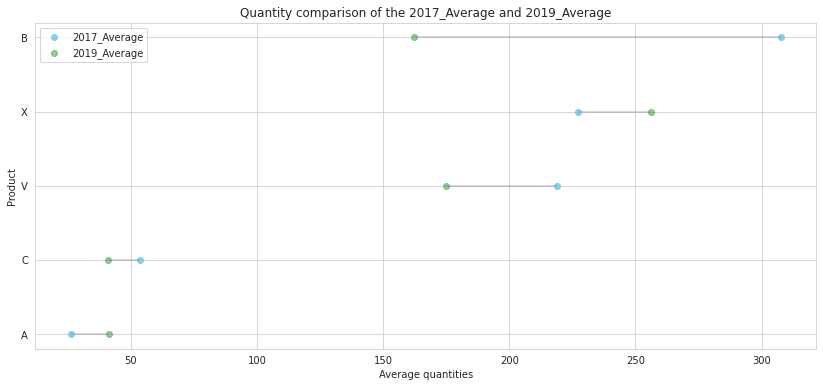

In [ ]:
#Lollipop Graph
plt.figure(figsize=(14,6))
ordered_df = df_17_19.sort_values(by='2017_Average')
my_range=range(1,len(df_17_19.index)+1)

plt.hlines(y=my_range, xmin=ordered_df['2017_Average'], xmax=ordered_df['2019_Average'], color='grey', alpha=0.4)
plt.scatter(ordered_df['2017_Average'], my_range, color='skyblue', alpha=1, label='2017_Average')
plt.scatter(ordered_df['2019_Average'], my_range, color='green', alpha=0.4 , label='2019_Average')
plt.legend()

plt.yticks(my_range, ordered_df['Product'])
plt.title("Quantity comparison of the 2017_Average and 2019_Average")
plt.xlabel('Average quantities')
plt.ylabel('Product')

plt.show()

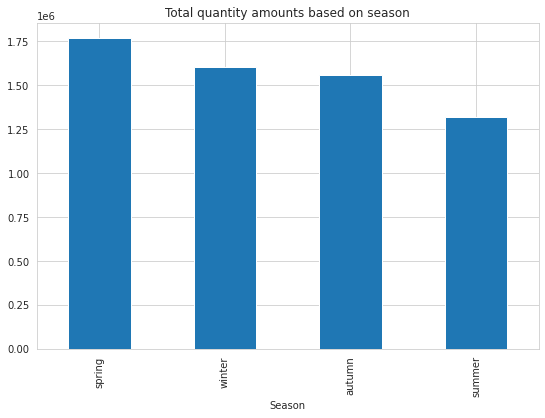

In [ ]:
df.groupby("Season")["Quantity"].sum().sort_values(ascending=False).plot(kind="bar",figsize=(9,6))
plt.title("Total quantity amounts based on season")
plt.show()

<Figure size 1296x432 with 0 Axes>

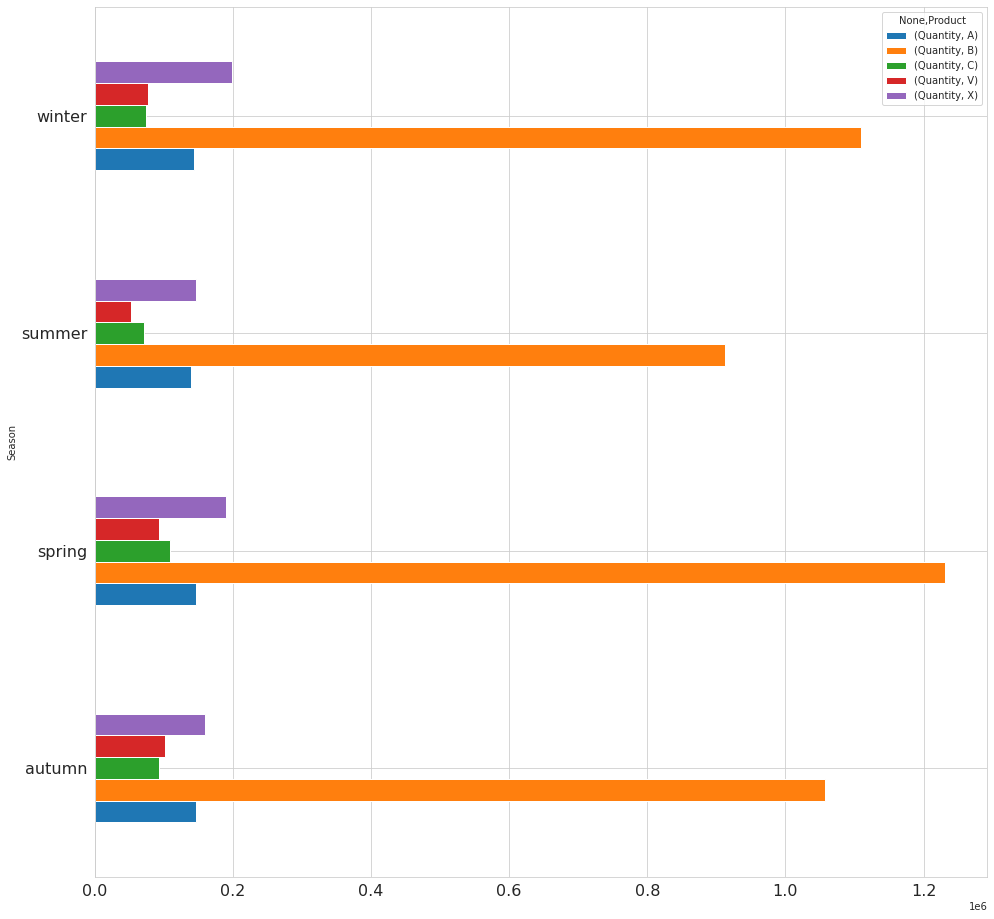

In [ ]:
plt.figure(figsize=(18,6))
df.pivot_table(index=["Season"],columns='Product',aggfunc={"Quantity":"sum"}).plot(kind="barh",figsize=(16,16),fontsize=16)
plt.show()



# sns.barplot(x=df["Season"],y=df["Quantity"],hue=df.Product)
# plt.title("Frequency based on Season and Product Type")
# plt.show()


# df.pivot_table(index=["Product"],columns=["Metropol"],aggfunc={"Quantity":"sum"}).plot(kind="barh",figsize=(26,8))
# plt.title('Total Product Amounts based on Metropol and Product type', fontsize=16)


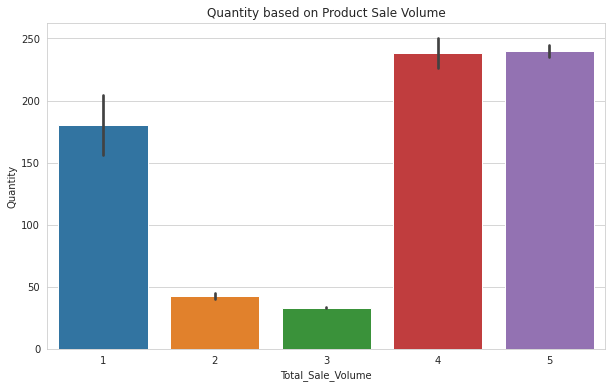

In [ ]:
plt.figure(figsize=(10,6))
sns.barplot(x=df["Total_Sale_Volume"],y=df["Quantity"])
plt.title("Quantity based on Product Sale Volume")
plt.show()

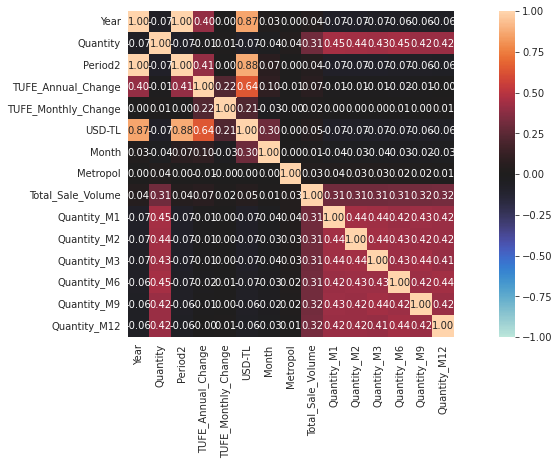

In [ ]:
plt.figure(figsize=(16, 6))
sns.heatmap(df.corr(), vmin=-1, vmax=1, center=0,square=True,annot=True,fmt='.2f',)

# **Target Outlier Elimination**
Target feature 'Quantity' is highly skewed and has many outliers in it.
Also since minus values of quantity feature represent refund info, we should deal with them before building ML model.

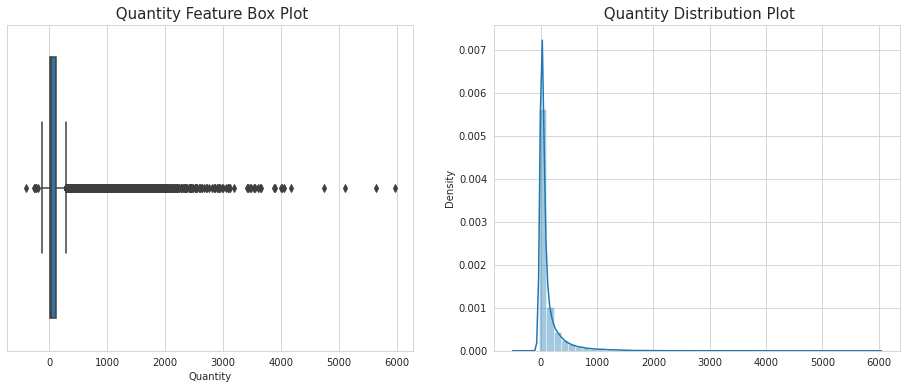

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Quantity",data=df)
plt.title(' Quantity Feature Box Plot', fontsize=15)


plt.subplot(1, 2, 2)
sns.distplot(x=df["Quantity"])
plt.title(' Quantity Distribution Plot', fontsize=15)

plt.show() #quantity's distribution before outlier handling and log transform

In [ ]:
df.Quantity.describe()

count    48288.000000
mean       129.562127
std        260.973107
min       -407.000000
25%         13.000000
50%         39.000000
75%        122.000000
max       5958.000000
Name: Quantity, dtype: float64

In [ ]:
df.shape

(48288, 20)

In [ ]:
df.Quantity.skew(),df.Quantity.kurtosis() #referans değer

(5.297577127300716, 47.28443020854957)

In [ ]:
#Outlier handling
df = df[df['Quantity'] > 0] #refund

Q1 = df.Quantity.quantile(0.25)
Q3 = df.Quantity.quantile(0.75)
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")

def remove_outlier(df_in, col_name):
    q1 = df_in[col_name].quantile(0.25)
    q3 = df_in[col_name].quantile(0.75)
    iqr = q3-q1 #Interquartile range
    fence_low  = q1-1.5*iqr
    fence_high = q3+1.5*iqr
    df_out = df_in.loc[(df_in[col_name] > fence_low) & (df_in[col_name] < fence_high)]
    return df_out

df = remove_outlier(df,'Quantity')

df['Quantity'] = np.log10(df['Quantity']) # since target quantity is highly skewed, appylinglog10 transform to the target.

Anything outside this range is an outlier: ( -151.0 , 289.0 )


In [ ]:
df.shape

(41621, 20)

**Target's distribution after outlier handling and log transform applied.**

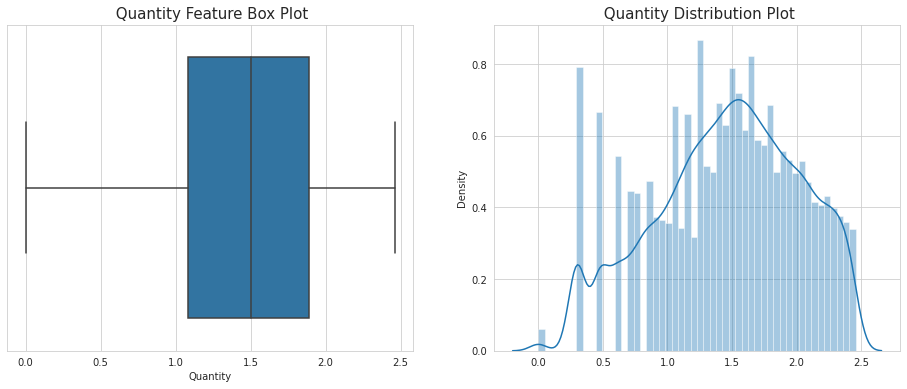

In [ ]:
plt.figure(figsize=(16, 6))
plt.subplot(1, 2, 1)
sns.boxplot(x="Quantity",data=df)
plt.title(' Quantity Feature Box Plot', fontsize=15)

plt.subplot(1, 2, 2)
sns.distplot(x=df["Quantity"])
plt.title(' Quantity Distribution Plot', fontsize=15)

plt.show()

In [ ]:
df.Quantity.skew(),df.Quantity.kurtosis() #quantity distribution after outlier handling and log transform.

(-0.293662741497146, -0.6443194812856272)

# **Model Building**

In [ ]:
df.tail() 
df.fillna(df.mean(),inplace=True)

In [ ]:
from sklearn.utils import shuffle
df = shuffle(df) 
#df.to_csv("final_data.csv")


df.fillna(df.mean(),inplace=True)

# The features below that will be included to the model. 
#'CDS_Change','CDS_Min','CDS_Max',,'Quantity_M2','Quantity_M1'

#Dummy encoding Product,Region and Season categorical features and concat. them with numerical features.
X = pd.concat([pd.get_dummies(df[["Product","Region","Season"]],drop_first=True),df[["USD-TL","Quantity_M9","Quantity_M12",'Quantity_M6','Quantity_M3',"Metropol","Total_Sale_Volume","TUFE_Annual_Change","TUFE_Monthly_Change"]]],axis=1)
y = df['Quantity']
X.head()

#train - test split


from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=2021)


In [ ]:
pd.DataFrame(X)

,Season_spring,Season_summer,Season_winter,Product_B,Product_C,Product_V,Product_X,USD-TL,Quantity_M9,Quantity_M12,Quantity_M6,Quantity_M3,TUFE_Annual_Change,TUFE_Monthly_Change,Total_Sale_Volume
45382,0,0,1,0,0,0,1,3.741614,97.531593,99.074121,96.170152,95.390485,9.22,2.46,4
45380,0,0,1,0,0,0,1,3.741614,97.531593,99.074121,96.170152,95.390485,9.22,2.46,4
45379,0,0,1,0,0,0,1,3.741614,97.531593,99.074121,96.170152,95.390485,9.22,2.46,4
45377,0,0,1,0,0,0,1,3.741614,97.531593,99.074121,96.170152,95.390485,9.22,2.46,4
45376,0,0,1,0,0,0,1,3.741614,97.531593,99.074121,96.170152,95.390485,9.22,2.46,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
47455,0,0,1,0,0,0,1,5.848150,14.000000,14.000000,20.000000,3.000000,11.84,0.74,4
47451,0,0,1,0,0,0,1,5.848150,170.000000,142.000000,121.000000,12.000000,11.84,0.74,4
47450,0,0,1,0,0,0,1,5.848150,165.000000,68.000000,107.000000,6.000000,11.84,0.74,4
47449,0,0,1,0,0,0,1,5.848150,137.000000,158.000000,222.000000,61.000000,11.84,0.74,4


# **Non-Linear Models**

In [ ]:
!pip install catboost
from sklearn import metrics
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import explained_variance_score
from catboost import CatBoostRegressor

def mape(actual, pred): #mean absolute percentage error func.
    actual, pred = np.array(actual), np.array(pred)
    return np.mean(np.abs((actual - pred) / actual)) * 100


categorical_features_indices = np.where(X.dtypes != np.float)[0]


catb = CatBoostRegressor()
catb_model = catb.fit(X_train, y_train)


pred = catb_model.predict(X_test)
pred = 10**pred #inverse log transform
y_test1 = 10**y_test #inverse log transform

print("R^2:",metrics.r2_score(y_test1, pred))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test1, pred))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test1, pred))
print("MSE:",metrics.mean_squared_error(y_test1, pred))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, pred)))
print("MAPE:",mape(y_test1,pred))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test1, pred))) / y_test1.mean()) #CoV=RMSE/mean(target)
print("Explanied Variance:",explained_variance_score(y_test1,  pred))



Learning rate set to 0.041986
0:	learn: 0.4743152	total: 48.9ms	remaining: 48.9s
1:	learn: 0.4635722	total: 50.5ms	remaining: 25.2s
2:	learn: 0.4529536	total: 52.2ms	remaining: 17.4s
3:	learn: 0.4437733	total: 53.8ms	remaining: 13.4s
4:	learn: 0.4355152	total: 55.3ms	remaining: 11s
5:	learn: 0.4277789	total: 56.8ms	remaining: 9.41s
6:	learn: 0.4198283	total: 58.4ms	remaining: 8.28s
7:	learn: 0.4119117	total: 59.9ms	remaining: 7.42s
8:	learn: 0.4042762	total: 61.7ms	remaining: 6.8s
9:	learn: 0.3971601	total: 63.6ms	remaining: 6.3s
10:	learn: 0.3901416	total: 65.4ms	remaining: 5.88s
11:	learn: 0.3827682	total: 67.1ms	remaining: 5.53s
12:	learn: 0.3775300	total: 68.8ms	remaining: 5.22s
13:	learn: 0.3720520	total: 70.7ms	remaining: 4.98s
14:	learn: 0.3663851	total: 72.6ms	remaining: 4.76s
15:	learn: 0.3611337	total: 74.4ms	remaining: 4.57s
16:	learn: 0.3561775	total: 76.1ms	remaining: 4.4s
17:	learn: 0.3510429	total: 78ms	remaining: 4.25s
18:	learn: 0.3472022	total: 79.8ms	remaining: 4.12s

In [ ]:
#CoV=RMSE/mean(target)
CoV_CTB = (np.sqrt(metrics.mean_squared_error(y_test1, pred))) / y_test1.mean()
CoV_CTB 


0.4521856085788714

In [ ]:
from xgboost import XGBRegressor
XGBMODEL = XGBRegressor(colsample_bytree= 0.7, learning_rate= 0.05, max_depth= 6, n_estimators= 500, cv = 10)
XGBMODEL.fit(X_train, y_train)
pred2 = XGBMODEL.predict(X_test)

pred2 = 10**pred2 #inverse log transform


print("R^2:",metrics.r2_score(y_test1, pred2))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test1, pred2))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test1, pred2))
print("MSE:",metrics.mean_squared_error(y_test1, pred2))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, pred2)))
print("MAPE:",mape(y_test1,pred2))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test1, pred2))) / y_test1.mean()) 
print("Explanied Variance:",explained_variance_score(y_test1,  pred2))

[18:20:10] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.
R^2: 0.6701769207659274
Adjusted R^2: 0.6623364355226451
MAE: 27.31119765085636
MSE: 1732.4996350168324
RMSE: 41.62330639217447
MAPE: 55.4341804835898
CoV: 0.47536325700305165
Explanied Variance: 0.6781353479616634


In [ ]:
#CoV=RMSE/mean(target)
CoV_XGB = (np.sqrt(metrics.mean_squared_error(y_test1, pred2))) / y_test1.mean()
CoV_XGB

0.47536325700305165

In [ ]:
from sklearn.metrics import explained_variance_score
explained_variance_score(y_test1,  pred2)

0.6781353479616634

**The Importances of the features, According to XGBoost Model**

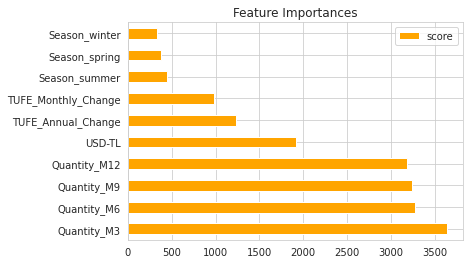

In [ ]:
feature_important = XGBMODEL.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh',title='Feature Importances',color= 'orange')


In [ ]:
from sklearn.neighbors import KNeighborsRegressor
knn_model = KNeighborsRegressor().fit(X_train, y_train)
pred3 = knn_model.predict(X_test)
pred3 = 10**pred3 #inverse log transform

print("R^2:",metrics.r2_score(y_test1, pred3))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test1, pred3))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test1, pred3))
print("MSE:",metrics.mean_squared_error(y_test1, pred3))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, pred3)))
print("MAPE:",mape(y_test1,pred3))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test1, pred3))) / y_test1.mean()) 
print("Explanied Variance:",explained_variance_score(y_test1,  pred3))

R^2: 0.4696905411872677
Adjusted R^2: 0.45708413566874007
MAE: 34.47934401943804
MSE: 2785.61750733943
RMSE: 52.778949471730016
MAPE: 95.37891825286314
CoV: 0.602767427596719
Explanied Variance: 0.4826031354902317


In [ ]:
from sklearn.ensemble import GradientBoostingRegressor
gbm_model = GradientBoostingRegressor()
gbm_model.fit(X_train, y_train)
pred6 = gbm_model.predict(X_test)

pred6 = 10**pred6 #inverse log transform

print("R^2:",metrics.r2_score(y_test1, pred6))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test1, pred6))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test1, pred6))
print("MSE:",metrics.mean_squared_error(y_test1, pred6))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, pred6)))
print("MAPE:",mape(y_test1,pred6))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test1, pred6))) / y_test1.mean()) 
print("Explanied Variance:",explained_variance_score(y_test1,  pred6))

R^2: 0.687786557077309
Adjusted R^2: 0.68036468442463
MAE: 26.325019783425255
MSE: 1639.9994723444809
RMSE: 40.496906947870485
MAPE: 54.969464758307
CoV: 0.46249909615321977
Explanied Variance: 0.6986192130319888


In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf_model = RandomForestRegressor(random_state = 2021)
rf_model.fit(X_train, y_train)
pred5 = rf_model.predict(X_test)
pred5 = 10**pred5 #inverse log transform

print("R^2:",metrics.r2_score(y_test1, pred5))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test1, pred5))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test1, pred5))
print("MSE:",metrics.mean_squared_error(y_test1, pred5))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, pred5)))
print("MAPE:",mape(y_test1,pred5))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test1, pred5))) / y_test1.mean()) 
print("Explanied Variance:",explained_variance_score(y_test1,  pred5))

R^2: 0.6695130783283246
Adjusted R^2: 0.6616568123614861
MAE: 27.404773514668797
MSE: 1735.9866765650659
RMSE: 41.66517342535689
MAPE: 57.467124879375596
CoV: 0.4758414037669616
Explanied Variance: 0.6781957003375652


In [ ]:
from sklearn.neural_network import MLPRegressor
mlp_model = MLPRegressor(hidden_layer_sizes = (100,20)).fit(X_train, 10**y_train)
pred4 = mlp_model.predict(X_test)


print("R^2:",metrics.r2_score(y_test1, pred4))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test1, pred4))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test1, pred4))
print("MSE:",metrics.mean_squared_error(y_test1, pred4))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, pred4)))
print("MAPE:",mape(y_test1,pred4))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test1, pred4))) / y_test1.mean()) 
print("Explanied Variance:",explained_variance_score(y_test1,  pred4))

R^2: 0.5962951305916233
Adjusted R^2: 0.5866983428877792
MAE: 31.543158893917045
MSE: 2120.587014495002
RMSE: 46.04983186174519
MAPE: 113.4562019078669
CoV: 0.525916846970083
Explanied Variance: 0.5981163508229435


# **Linear Models**

In [ ]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.model_selection import train_test_split, cross_val_score, cross_val_predict

lm = sm.OLS(y_train, X_train)
model = lm.fit()
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Quantity   R-squared:                       0.340
Model:                            OLS   Adj. R-squared:                  0.335
Method:                 Least Squares   F-statistic:                     76.96
Date:                Sat, 25 Sep 2021   Prob (F-statistic):          2.62e-127
Time:                        18:20:35   Log-Likelihood:                -734.24
No. Observations:                1507   AIC:                             1490.
Df Residuals:                    1496   BIC:                             1549.
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
=======================================================================================
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Season_spring           0.0627      0.030      2.089      0.037       0.004       0.122
Season_summer           0.0289      0.030      0.970      0.332      -0.030       0.087
Season_winter           0.1025      0.030      3.375      0.001       0.043       0.162
Product_B            3.402e-16   1.54e-16      2.213      0.027    3.86e-17    6.42e-16
Product_C            1.192e-16   1.16e-16      1.027      0.305   -1.09e-16    3.47e-16
Product_V           -5.403e-16   4.71e-17    -11.482      0.000   -6.33e-16   -4.48e-16
Product_X               0.0900      0.003     26.294      0.000       0.083       0.097
USD-TL                 -0.0772      0.015     -5.272      0.000      -0.106      -0.048
Quantity_M9             0.0019      0.000      7.996      0.000       0.001       0.002
Quantity_M12           -0.0008      0.000     -4.742      0.000      -0.001      -0.000
Quantity_M6            -0.0011      0.000     -4.891      0.000      -0.001      -0.001
Quantity_M3             0.0029      0.000     16.649      0.000       0.003       0.003
TUFE_Annual_Change      0.0189      0.003      6.115      0.000       0.013       0.025
TUFE_Monthly_Change     0.0041      0.009      0.457      0.648      -0.014       0.022
Total_Sale_Volume       0.3600      0.014     26.294      0.000       0.333       0.387
==============================================================================
Omnibus:                      262.909   Durbin-Watson:                   2.018
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              498.550
Skew:                          -1.052   Prob(JB):                    5.51e-109
Kurtosis:                       4.873   Cond. No.                     3.88e+19
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The smallest eigenvalue is 8.9e-32. This might indicate that there are
strong multicollinearity problems or that the design matrix is singular.
"""

In [ ]:
pred11= model.predict(X_test)
pred11= 10**pred11 #inverse log transform.

print("R^2:",metrics.r2_score(y_test1, pred11))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test1, pred11))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test1, pred11))
print("MSE:",metrics.mean_squared_error(y_test1, pred11))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, pred11)))
print("MAPE:",mape(y_test1,pred11))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test1, pred11))) / y_test1.mean()) 
print("Explanied Variance:",explained_variance_score(y_test1,  pred11))

R^2: -0.721727193241394
Adjusted R^2: -0.7626557319079881
MAE: 46.924058874732815
MSE: 9043.914515673834
RMSE: 95.09949797803264
MAPE: 135.18391462609057
CoV: 1.0860936099658816
Explanied Variance: -0.6929892360261454


In [ ]:
from sklearn.linear_model import Ridge
ridge_model = Ridge(alpha = 0.1).fit(X_train, y_train)
pred7 = ridge_model.predict(X_test)
pred7= 10**pred7 #inverse log transform.

print("R^2:",metrics.r2_score(y_test1, pred7))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test1, pred7))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test1, pred7))
print("MSE:",metrics.mean_squared_error(y_test1, pred7))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, pred7)))
print("MAPE:",mape(y_test1,pred7))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test1, pred7))) / y_test1.mean()) 
print("Explanied Variance:",explained_variance_score(y_test1,  pred7))

R^2: -0.72173216226737
Adjusted R^2: -0.7626608190566102
MAE: 46.92403958070412
MSE: 9043.940617048274
RMSE: 95.09963520985912
MAPE: 135.18510063407618
CoV: 1.0860951772360878
Explanied Variance: -0.6929907154514479


In [ ]:
from sklearn.linear_model import Lasso
lasso_model = Lasso(alpha = 0.1).fit(X_train, y_train)
pred8 = lasso_model.predict(X_test)
pred8 = 10**pred8 #inverse log transform.

print("R^2:",metrics.r2_score(y_test1, pred8))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test1, pred8))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test1, pred8))
print("MSE:",metrics.mean_squared_error(y_test1, pred8))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, pred8)))
print("MAPE:",mape(y_test1,pred8))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test1, pred8))) / y_test1.mean()) 
print("Explanied Variance:",explained_variance_score(y_test1,  pred8))

R^2: -0.8471777928189352
Adjusted R^2: -0.891088516895455
MAE: 49.00050099797022
MSE: 9702.883313386401
RMSE: 98.50321473630392
MAPE: 145.9056313438938
CoV: 1.124966107717091
Explanied Variance: -0.8172098498865321


In [ ]:
from sklearn.linear_model import ElasticNet
enet_model = ElasticNet().fit(X_train, y_train)
pred9 = enet_model.predict(X_test)
pred9 = 10**pred9 #inverse log transform.

print("R^2:",metrics.r2_score(y_test1, pred9))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test1, pred9))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test1, pred9))
print("MSE:",metrics.mean_squared_error(y_test1, pred9))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, pred9)))
print("MAPE:",mape(y_test1,pred9))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test1, pred9))) / y_test1.mean()) 
print("Explanied Variance:",explained_variance_score(y_test1,  pred9))


R^2: -1.03011452866268
Adjusted R^2: -1.0783739865548196
MAE: 49.92147765892797
MSE: 10663.816152945305
RMSE: 103.26575498656514
MAPE: 153.32619516308117
CoV: 1.1793571890896641
Explanied Variance: -0.9990368225882409


# **Model Comparision**

Since most of the data contains categorical features, Non-Linear Models performed slightly better than linear models.

In [ ]:
RegModels={"CastBoost":[round(metrics.r2_score(y_test1, pred),2),round((1 - (1-metrics.r2_score(y_test1, pred))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1)), 2),
         round(metrics.mean_absolute_error(y_test1, pred),2),round( metrics.mean_squared_error(y_test1, pred),2), round( np.sqrt(metrics.mean_squared_error(y_test1, pred)),2),round(mape(y_test1,pred),2),round((np.sqrt(metrics.mean_squared_error(y_test1, pred))) / y_test1.mean(),2),round(explained_variance_score(y_test1,  pred),2)],
         "XGBoost":[round(metrics.r2_score(y_test1, pred2),2),round((1 - (1-metrics.r2_score(y_test1, pred2))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1)), 2),
         round(metrics.mean_absolute_error(y_test1, pred2),2),round( metrics.mean_squared_error(y_test1, pred2),2), round( np.sqrt(metrics.mean_squared_error(y_test1, pred2)),2),round(mape(y_test1,pred2),2),round((np.sqrt(metrics.mean_squared_error(y_test1, pred2))) / y_test1.mean(),2),round(explained_variance_score(y_test1,  pred2),2)],
         "GBM" : [round(metrics.r2_score(y_test1, pred6),2),round((1 - (1-metrics.r2_score(y_test1, pred6))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1)), 2),
         round(metrics.mean_absolute_error(y_test1, pred6),2),round( metrics.mean_squared_error(y_test1, pred6),2), round( np.sqrt(metrics.mean_squared_error(y_test1, pred6)),2),round(mape(y_test1,pred6),2),round((np.sqrt(metrics.mean_squared_error(y_test1, pred6))) / y_test1.mean(),2),round(explained_variance_score(y_test1,  pred6),2)],
      }
indexR=["R^2:","Adjusted R^2:","MAE:","MSE:","RMSE:","MAPE:","CoV:","Explained Variance:"]
df_modelss=pd.DataFrame(RegModels,index=indexR)

In [ ]:
df_modelss.head(8)

,CastBoost,XGBoost,GBM
R^2:,0.70,0.67,0.69
Adjusted R^2:,0.69,0.66,0.68
MAE:,25.98,27.31,26.33
MSE:,1567.67,1732.50,1640.00
RMSE:,39.59,41.62,40.50
MAPE:,54.63,55.43,54.97
CoV:,0.45,0.48,0.46
Explained Variance:,0.71,0.68,0.70


**Since most of the data contains categorical features, Non-Linear Models performed slightly better than linear models. Catboost XGBoost and Multi Layer Perceptron models seems to perform slightly better than others. Let's make hyperparameter tuning for them. Since CatBoost also proven itself for working well with categorical variables, we might get better score from the CatBoost model.**

# **Hyperparameter Tuning**

**Firstly, We try hyperparameter Tuning for XGBoost Model.**

In [ ]:
from sklearn.model_selection import GridSearchCV
# xgb_grid = {
#      'colsample_bytree': [0.4, 0.5,0.6,0.9,1], 
#      'n_estimators':[100, 200, 500, 1000],
#      'max_depth': [2,3,4,5,6],
#      'learning_rate': [0.1, 0.01, 0.5]
# }

In [ ]:
# xgb = XGBRegressor()

# xgb_cv = GridSearchCV(xgb, 
#                       param_grid = xgb_grid, 
#                       cv = 4, 
#                       n_jobs = -1,
#                       verbose = 2)


# xgb_cv.fit(X_train, y_train)

In [ ]:
# xgb_cv.best_params_

**The Best Parameters for XGB model is
{'colsample_bytree': 0.9,
 'learning_rate': 0.1,
 'max_depth': 4,
 'n_estimators': 200}**

In [ ]:
# Building XGB model with respect to its best parameters
xgb_tuned = XGBRegressor(colsample_bytree = 0.9, 
                         learning_rate = 0.1, 
                         max_depth = 4, 
                         n_estimators = 200,
                         min_child_weight = 0.05) 

xgb_tuned = xgb_tuned.fit(X_train,y_train)

[17:47:58] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


In [ ]:
predXGB = xgb_tuned.predict(X_test)
predXGB = 10**predXGB #inverse log transform.

In [ ]:
print("R^2:",metrics.r2_score(y_test1, predXGB))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test1, predXGB))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test1, predXGB))
print("MSE:",metrics.mean_squared_error(y_test1, predXGB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, predXGB)))
print("MAPE:",mape(y_test1,predXGB))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test1, predXGB))) / y_test1.mean()) 
print("Explanied Variance:",explained_variance_score(y_test1, predXGB))

R^2: 0.3341478045506847
Adjusted R^2: 0.3329725198668043
MAE: 32.18705616581953
MSE: 2759.550428276075
RMSE: 52.53142324624448
MAPE: 99.32558685107256
CoV: 0.9104155719395186
Explanied Variance: 0.39455403002482636


**The Importances  of the Features, According to XGBoost Tuned Model**

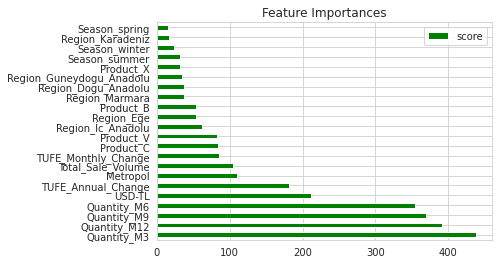

In [ ]:
feature_important = xgb_tuned.get_booster().get_score(importance_type='weight')
keys = list(feature_important.keys())
values = list(feature_important.values())

data = pd.DataFrame(data=values, index=keys, columns=["score"]).sort_values(by = "score", ascending=False)
data.plot(kind='barh',title = 'Feature Importances',color='green')


**CatBoost Model Tuning**

In [ ]:
# catb_grid = {
#     'iterations': [1000,2000],
#     'learning_rate': [0.05:0.1],
#     'depth': [3,4,5] }
# rand search

In [ ]:
# catb = CatBoostRegressor()
# catb_cv_model = GridSearchCV(catb, catb_grid, cv=3, n_jobs = -1, verbose = 2)

In [ ]:
# catb_cv_model.fit(X_train, y_train)

**The Best Parameters for CatBoost model is {'depth': 4, 'iterations': 1000, 'learning_rate': 0.05}**

In [ ]:
# Building CatBoost model with respect to its best parameters.
catb_tuned = CatBoostRegressor(iterations = 1000, 
                               learning_rate = 0.05, 
                               depth = 4)

catb_tuned = catb_tuned.fit(X_train,y_train)

0:	learn: 0.5488146	total: 5.9ms	remaining: 5.89s
1:	learn: 0.5394793	total: 10.5ms	remaining: 5.22s
2:	learn: 0.5310241	total: 14.8ms	remaining: 4.92s
3:	learn: 0.5230978	total: 19.3ms	remaining: 4.8s
4:	learn: 0.5158089	total: 23.8ms	remaining: 4.73s
5:	learn: 0.5091082	total: 28.1ms	remaining: 4.65s
6:	learn: 0.5027814	total: 32.3ms	remaining: 4.58s
7:	learn: 0.4969655	total: 36.6ms	remaining: 4.54s
8:	learn: 0.4915676	total: 41ms	remaining: 4.51s
9:	learn: 0.4866428	total: 45.5ms	remaining: 4.5s
10:	learn: 0.4821191	total: 50ms	remaining: 4.5s
11:	learn: 0.4781379	total: 54.5ms	remaining: 4.49s
12:	learn: 0.4742219	total: 58.7ms	remaining: 4.46s
13:	learn: 0.4704906	total: 63.2ms	remaining: 4.45s
14:	learn: 0.4672499	total: 67.8ms	remaining: 4.45s
15:	learn: 0.4640986	total: 72.4ms	remaining: 4.45s
16:	learn: 0.4612288	total: 77.1ms	remaining: 4.46s
17:	learn: 0.4586647	total: 81.4ms	remaining: 4.44s
18:	learn: 0.4558421	total: 85.5ms	remaining: 4.41s
19:	learn: 0.4532861	total: 89

In [ ]:
predCatB = catb_tuned.predict(X_test)
predCatB = 10**predCatB #inverse log transform.

In [ ]:
print("R^2:",metrics.r2_score(y_test1, predCatB))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test1, predCatB))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test1, predCatB))
print("MSE:",metrics.mean_squared_error(y_test1, predCatB))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, predCatB)))
print("MAPE:",mape(y_test1,predCatB))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test1, predCatB))) / y_test1.mean()) 
print("Explanied Variance:",explained_variance_score(y_test1, predCatB))

R^2: 0.33825027802841023
Adjusted R^2: 0.3370822345525297
MAE: 32.12559693869621
MSE: 2742.5481828531106
RMSE: 52.36934392230927
MAPE: 98.83933753792665
CoV: 0.9076065953064594
Explanied Variance: 0.39911601556592724


**Multi Layer Perceptron hyperparameter tuning**

In [ ]:
# mlp_params = {'alpha': [0.1],
#              'hidden_layer_sizes': [(20,20),(100,50,150),(300,200,150)],
#              'activation': ['relu','logistic']}

In [ ]:
# mlp_cv_model = GridSearchCV(mlp_model, mlp_params, cv = 3)

In [ ]:
# mlp_cv_model.fit(X_train, y_train)

In [ ]:
# mlp_cv_model.best_params_

**The Best Parameters for Multi Layer Perceptron model is {'activation': 'relu', 'alpha': 0.1, 'hidden_layer_sizes': (100, 50, 150)}**

**The Best Parameters for MLP model is max_depth  = 8, 
                                 max_features = 3, 
                                 n_estimators =200**

In [ ]:
# Building MLP with respect to its best parameters.
mlp_tuned = MLPRegressor(alpha = 0.1, hidden_layer_sizes = (100,50,150),activation='relu')

In [ ]:
mlp_tuned.fit(X_train, 10**y_train)

MLPRegressor(activation='relu', alpha=0.1, batch_size='auto', beta_1=0.9,
             beta_2=0.999, early_stopping=False, epsilon=1e-08,
             hidden_layer_sizes=(100, 50, 150), learning_rate='constant',
             learning_rate_init=0.001, max_fun=15000, max_iter=200,
             momentum=0.9, n_iter_no_change=10, nesterovs_momentum=True,
             power_t=0.5, random_state=None, shuffle=True, solver='adam',
             tol=0.0001, validation_fraction=0.1, verbose=False,
             warm_start=False)

In [ ]:
predMLP = mlp_tuned.predict(X_test)

In [ ]:
print("R^2:",metrics.r2_score(y_test1, predMLP))
print("Adjusted R^2:",1 - (1-metrics.r2_score(y_test1, predMLP))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
print("MAE:",metrics.mean_absolute_error(y_test1, predMLP))
print("MSE:",metrics.mean_squared_error(y_test1, predMLP))
print("RMSE:",np.sqrt(metrics.mean_squared_error(y_test1, predMLP)))
print("MAPE:",mape(y_test1,predMLP))
print("CoV:",(np.sqrt(metrics.mean_squared_error(y_test1, predMLP))) / y_test1.mean()) 
print("Explanied Variance:",explained_variance_score(y_test1, predMLP))

R^2: 0.32325582056016666
Adjusted R^2: 0.3220613106157125
MAE: 35.49117943423338
MSE: 2804.6910455049897
RMSE: 52.95933388464199
MAPE: 173.2668040386855
CoV: 0.9178316380675866
Explanied Variance: 0.3234342882444905


# **Comparision of Tuned Models**

In [ ]:

RegModelsTuned={"CatBoostRegressor":[metrics.r2_score(y_test1, predCatB),
(1 - (1-metrics.r2_score(y_test1, predCatB))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
,metrics.mean_absolute_error(y_test1, predCatB)
,metrics.mean_squared_error(y_test1, predCatB)
,np.sqrt(metrics.mean_squared_error(y_test1, predCatB))
,mape(y_test1,predCatB)
,(np.sqrt(metrics.mean_squared_error(y_test1, predCatB))) / y_test1.mean() 
,explained_variance_score(y_test1, predCatB)],
         "XGBoostRegressor":[metrics.r2_score(y_test1, predXGB),(1 - (1-metrics.r2_score(y_test1, predXGB))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1)),
metrics.mean_absolute_error(y_test1, predXGB),metrics.mean_squared_error(y_test1, predXGB),np.sqrt(metrics.mean_squared_error(y_test1, predXGB)),
mape(y_test1,predXGB),(np.sqrt(metrics.mean_squared_error(y_test1, predXGB))) / y_test1.mean(),explained_variance_score(y_test1, predXGB)],
         "MLP":[metrics.r2_score(y_test1, predMLP),(1 - (1-metrics.r2_score(y_test1, predMLP))*(len(y_test1)-1)/(len(y_test1)-X_test.shape[1]-1))
,metrics.mean_absolute_error(y_test1, predMLP)
,metrics.mean_squared_error(y_test1, predMLP)
,np.sqrt(metrics.mean_squared_error(y_test1, predMLP))
,mape(y_test1,predMLP)
,(np.sqrt(metrics.mean_squared_error(y_test1, predMLP))) / y_test1.mean()
,explained_variance_score(y_test1, predMLP)]
         }
indexR=["R^2:","Adjusted R^2:","MAE:","MSE:","RMSE:","MAPE:","CoV:","Explanied Variance:"]
df_models_tuned=pd.DataFrame(RegModelsTuned,index=indexR)

In [ ]:
df_models_tuned.head(8)

,CatBoostRegressor,XGBoostRegressor,MLP
R^2:,0.338250,0.334148,0.323256
Adjusted R^2:,0.337082,0.332973,0.322061
MAE:,32.125597,32.187056,35.491179
MSE:,2742.548183,2759.550428,2804.691046
RMSE:,52.369344,52.531423,52.959334
MAPE:,98.839338,99.325587,173.266804
CoV:,0.907607,0.910416,0.917832
Explanied Variance:,0.399116,0.394554,0.323434


# **Conclusion**
**After hyperparameter tuning operations, it seems that there is not significantly difference amongst three models that performances shown above. However, the data that given to the models contain mostly categorical variables therefore it seems catboost model is the logical choice here for this particular case since catboost model deals better with categorical features.**